### Predicting Wine Quality using Wine Quality Dataset
- The aim of this project is to predict the quality of wine on a scale of 0–10 given a set of features as inputs. 
- The dataset used is Wine Quality Data set from UCI MachineLearning Repository. 

In [1]:
# Installing Libraries: Importing modules from packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


In [2]:
# Data Gathering: Importing the dataset 

data = pd.read_csv(r'C:\path\dataset.csv')

In [3]:
# Data Exploration: Drawing insights from data

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
# Data Exploration: Determining the shape of dataset

data.shape

(1599, 12)

In [5]:
# Data Exploration: Summarizing the data 

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Data Cleaning: Checking for missing values

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Data Cleaning: Checking for null values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

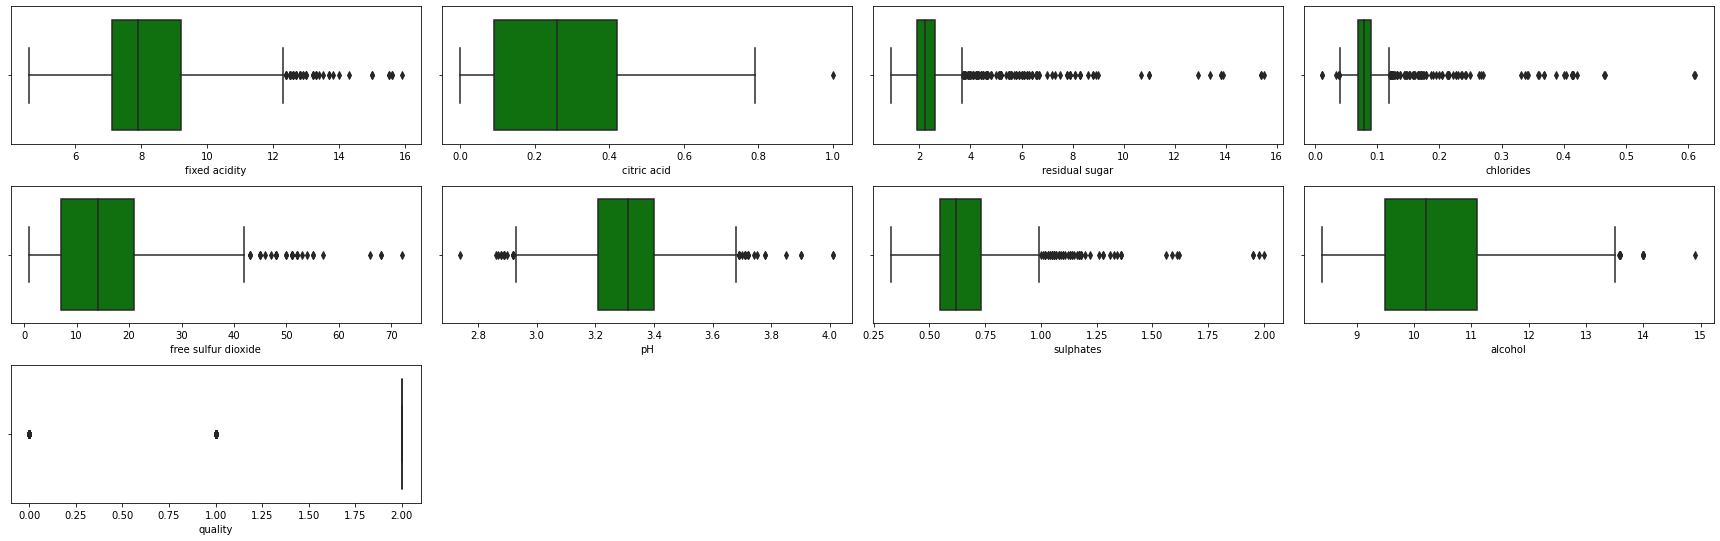

In [36]:
# Data pre-processing: Checking for outliers through boxplots

l = data.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows+10, number_of_columns-8, i+1)
    sns.boxplot(data[l[i]],color='green')
    plt.tight_layout()
    

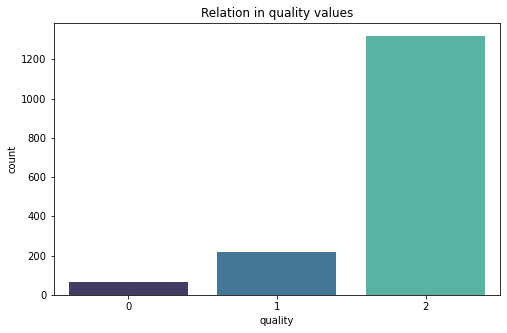

In [38]:
# Data Distribution: Understanding the target variable (Quality)

plt.figure(figsize=(8, 5))
sns.countplot(data["quality"], palette="mako")
plt.title('Relation in quality values')
data["quality"].value_counts()


In [10]:
# Data Pre-Processing: Classifying category as:
 
# 3,4   -> Bad

# 5,6   -> Medium

# 7,8,9 -> Good

quality = data["quality"].values

# Creating New Column: 'Category' 

category = []    

for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Medium")

        
# Displaying top 5 values of Category 

print(category[:5])     

['Medium', 'Medium', 'Medium', 'Medium', 'Medium']


In [11]:
# Data transformation: Adding 'Category' column to the dataset

category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([data,category],axis=1)
data.drop(columns="quality",axis=1)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


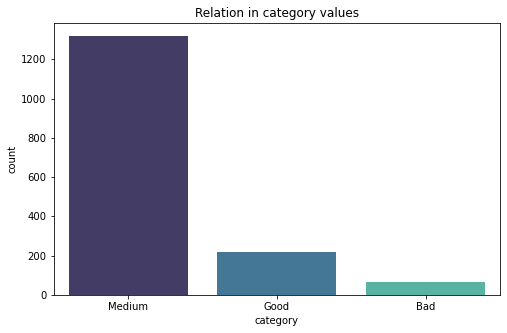

In [12]:
# Analyze Data: Determining the relationship between classes in 'Category' column

plt.figure(figsize=(8,5))
sns.countplot(data["category"],palette="mako")
plt.title('Relation in category values')

# Counting the number of each class

data["category"].value_counts()

<AxesSubplot:>

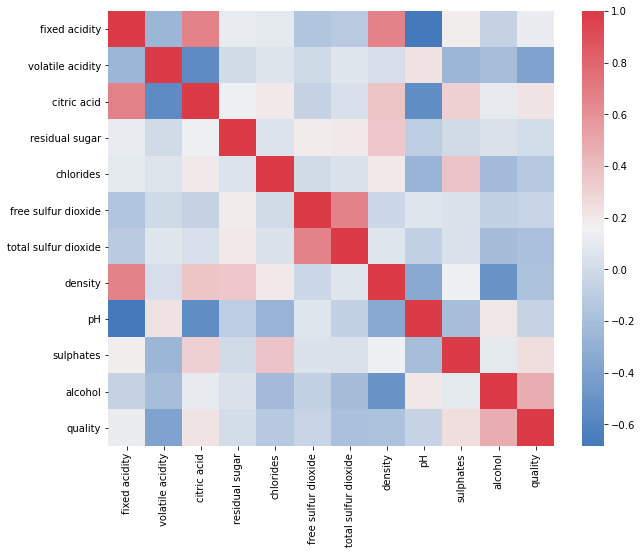

In [13]:
# Data Exploration and Visualization: Checking the correlation of columns using heatmap

plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), cmap=sns.diverging_palette(250, 10, as_cmap=True))

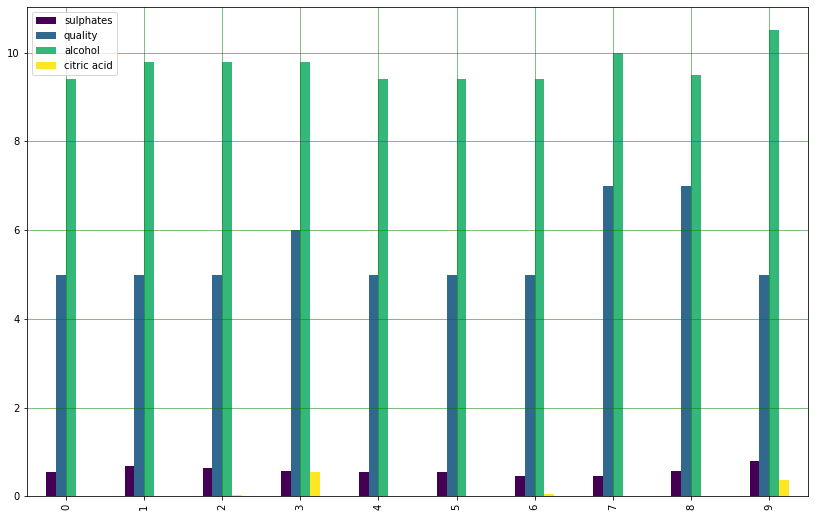

In [14]:
# Exploratory Data Analysis: Checking the correlation of top 3 columns affecting the target variable

df = pd.DataFrame(data)
selected_columns = df[["sulphates","quality","alcohol","citric acid"]]
new_df = selected_columns.copy()

df = new_df.head(10)
df.plot(kind='bar',figsize=(14,9), colormap='viridis')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<Figure size 576x360 with 0 Axes>

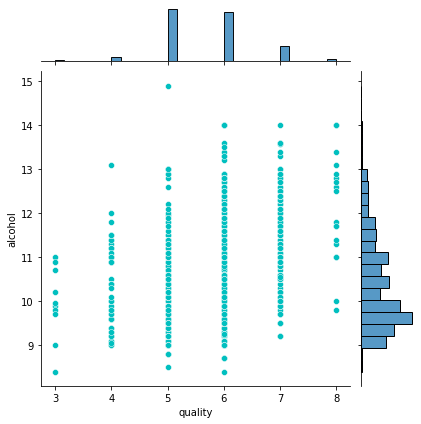

In [15]:
# Bivariate Analysis: Checking the variation of alcohol in the different qualities of wine

plt.figure(figsize=(8,5))
sns.jointplot(y=data["alcohol"],x=data["quality"],kind="scatter", joint_kws={'color':'c'})

In [16]:
# Data Pre-Processing: Classifying quality as:
 
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'medium', 6: 'medium', 7: 'good', 8: 'good'})

In [17]:
# Data Cleaning: Discarding columns which do not affect the target variable

data.drop(["density","total sulfur dioxide", "volatile acidity","category"], axis = 1, inplace = True)

data.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,3.51,0.56,9.4,medium
1,7.8,0.00,2.6,0.098,25.0,3.20,0.68,9.8,medium
2,7.8,0.04,2.3,0.092,15.0,3.26,0.65,9.8,medium
3,11.2,0.56,1.9,0.075,17.0,3.16,0.58,9.8,medium
4,7.4,0.00,1.9,0.076,11.0,3.51,0.56,9.4,medium


In [18]:
# Setting features, labels and Encoding the categorical data as:
# Good   ->1
# Medium ->2
# Bad    ->3

le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])
data['quality'].value_counts

In [19]:
# Dividing the dataset into dependent and independent variables

x = data.iloc[:,:8]
y = data.iloc[:,8]

In [20]:
# Splitting the data into Training and Testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Determining the shapes of training and testing sets

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 8)
(1279,)
(320, 8)
(320,)


In [21]:
# Standard Scaling: Scaling the data for optimised predictions 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Model Training 

### Random Forest 

In [22]:
# Creating the model
rfc = RandomForestClassifier(n_estimators = 250,oob_score = True)

# Feeding the training set into the model
rfc.fit(x_train, y_train)

# Predicting the results for the test set
pred_rfc = rfc.predict(x_test)

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.64      0.38      0.48        47
           2       0.86      0.96      0.91       262

    accuracy                           0.84       320
   macro avg       0.50      0.45      0.46       320
weighted avg       0.80      0.84      0.82       320



### Decision Tree

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.05      0.09      0.07        11
           1       0.41      0.40      0.41        47
           2       0.86      0.84      0.85       262

    accuracy                           0.75       320
   macro avg       0.44      0.44      0.44       320
weighted avg       0.77      0.75      0.76       320



### Support Vector Machine 

In [24]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.75      0.19      0.31        47
           2       0.84      0.99      0.91       262

    accuracy                           0.84       320
   macro avg       0.53      0.39      0.40       320
weighted avg       0.80      0.84      0.79       320



### K-Nearest Neighbors 

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.66      0.45      0.53        47
           2       0.87      0.95      0.91       262

    accuracy                           0.84       320
   macro avg       0.51      0.46      0.48       320
weighted avg       0.81      0.84      0.82       320



### Logistic Regression

In [26]:
lor = LogisticRegression()
lor.fit(x_train, y_train)
pred_lor = lor.predict(x_test)
print(classification_report(y_test, pred_lor))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.56      0.19      0.29        47
           2       0.84      0.97      0.90       262

    accuracy                           0.82       320
   macro avg       0.47      0.39      0.40       320
weighted avg       0.77      0.82      0.78       320



### XGBoost

In [27]:
xbc = xgb.XGBClassifier()
xbc.fit(x_train,y_train)
pred_xbc=xbc.predict(x_test)
print(classification_report(y_test, pred_xbc))

[22:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.59      0.40      0.48        47
           2       0.86      0.94      0.90       262

    accuracy                           0.83       320
   macro avg       0.49      0.45      0.46       320
weighted avg       0.79      0.83      0.81       320



### Multi-Layer Perceptron

In [28]:
mlp = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)
mlp.fit(x_train,y_train)
pred_mlp=xbc.predict(x_test)
print(classification_report(y_test, pred_mlp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.59      0.40      0.48        47
           2       0.86      0.94      0.90       262

    accuracy                           0.83       320
   macro avg       0.49      0.45      0.46       320
weighted avg       0.79      0.83      0.81       320



In [29]:
# Conclusion: Comparing the results!

conclusion = pd.DataFrame({'Model': ["Random Forest","K-Nearest Neighbors","Logistic Regression","Decision Tree","Support Vector Machine",
                                    "XGBoost","Multi-Layer Perceptron"],
                           'Accuracy': [accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn),
                                    accuracy_score(y_test,pred_lor),accuracy_score(y_test,pred_dtc),accuracy_score(y_test,pred_svc),
                                       accuracy_score(y_test,pred_xbc),accuracy_score(y_test,pred_mlp)]})
conclusion

,Model,Accuracy
0,Random Forest,0.843750
1,K-Nearest Neighbors,0.840625
2,Logistic Regression,0.825000
3,Decision Tree,0.746875
4,Support Vector Machine,0.837500
5,XGBoost,0.828125
6,Multi-Layer Perceptron,0.828125


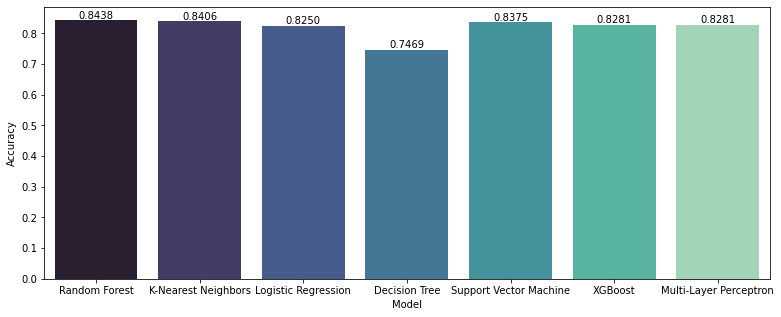

In [30]:
# Visualizing Results

plt.subplots(figsize=(13, 5))
axis = sns.barplot(x = 'Model', y = 'Accuracy', data =conclusion, palette="mako" )
axis.set(xlabel='Model', ylabel='Accuracy')

# Adding annotation to bars
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [31]:
# Model Evaluation: Evaluating Random Forest model using Cross Validation

model_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.8686700295275591

In [32]:
# Random Forest

# Calculating Training and Testing accuracies
print("Training accuracy :", rfc.score(x_train, y_train))
print("Testing accuracy :", rfc.score(x_test, y_test))

# Confusion Matrix
print("Confusion Matrix :\n",confusion_matrix(y_test, pred_rfc))

Training accuracy : 1.0
Testing accuracy : 0.84375
Confusion Matrix :
 [[  0   0  11]
 [  0  18  29]
 [  0  10 252]]


In [33]:
# Error Analysis: Calculating and Printing the Out-of-bag (OOB) error

print("OOB Score:",rfc.oob_score_)

OOB Score: 0.8663017982799062


In [34]:
# Data Accuracy: Tabulating Actual vs Predicted values

y_test = np.array(list(y_test))
y_pred = np.array(pred_rfc)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred_rfc.flatten()})
df[:20]

,Actual,Predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


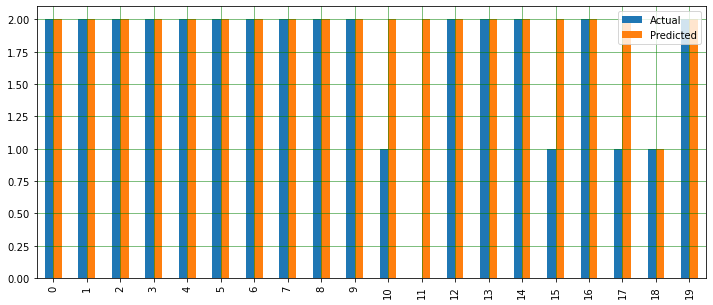

In [35]:
# Data Accuracy Visualization: Constructing Barplot of the above response

df1 = df.head(20)
df1.plot(kind='bar',figsize=(12,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()